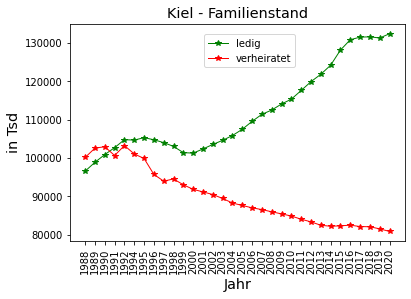

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import io


URL = "https://www.kiel.de/de/kiel_zukunft/statistik_kieler_zahlen/open_data/kiel_bevoelkerung_familienstand.csv"

# Use seaborn-bright style
plt.style.use('seaborn-bright')

# Create a subplot
fig, ax = plt.subplots()

# Fetch csv data
csv_data = requests.get(URL).content

# Create a dataframe
df = pd.read_csv(io.StringIO(csv_data.decode("utf-8")), sep=";")

# Print head (5 rows)
# print(df.head())

# Drop not available (na) data
df_cleaned = df.dropna(how="all")

# np.uint16: Unsigned integer (0 to 65535)
df_years = df_cleaned["Jahr"].astype(np.uint16)

x = df_years.values
yi = df_cleaned["ledig"].values
ye = df_cleaned["verheiratet"].values

plt.title("Kiel - Familienstand", size="x-large")
plt.ylabel("in Tsd", size="x-large")
plt.xlabel("Jahr", size="x-large")

plt.plot(yi, "*-", markersize=6, linewidth=1, color="g", label="ledig")
plt.plot(ye, "*-", markersize=6, linewidth=1, color="r", label="verheiratet")

plt.legend(loc=(0.4, 0.8))

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation="vertical")

plt.show()
